<a href="https://colab.research.google.com/github/chrisouma/chrisouma/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Pseudocode RNN
input_sequence=[0.1,0.2,0.3]
state_t=0
def f(input_t, state_t):
  for input_t in input_sequence:
    output_t=f(input_t,state_t)
  state_t=output_t
  return state_t

In [ ]:
import numpy as np
from numpy import dot
state_t=0
W=np.array([0.8])
U=np.array([0.8])
b=np.array([0.3])
for input_t in input_sequence:
  def activation(x):
    return np.tanh(x)
  output_t=activation(dot(W,input_t)+dot(U,state_t)+b)
  state_t=output_t

In [ ]:
import numpy as np
timesteps=200
input_features=64
output_features=128
inputs=np.random.random((output_features,input_features))
state_t=np.zeros((output_features,))
W=np.random.random((output_features,input_features))
U=np.random.random((output_features,output_features))
b=np.random.random((output_features,))
successive_outputs=[]
for input_t in inputs:
  output_t=np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)
  successive_outputs.append(output_t)
  state_t=output_t
  final_output_sequence=np.concatenate(successive_outputs,axis=0)



In [ ]:
print(W.shape)
print(input_t.shape)

(128, 64)
(64,)


In [ ]:
output_t=np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)

In [ ]:
print(final_output_sequence)
print(output_t)

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#Recurrent layer in Keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(20000,64))
model.add(SimpleRNN(64))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
Total params: 1288256 (4.91 MB)
Trainable params: 1288256 (4.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model=Sequential()
model.add(Embedding(20000,64))
model.add(SimpleRNN(64,return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          1280000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
Total params: 1288256 (4.91 MB)
Trainable params: 1288256 (4.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model=Sequential()
model.add(Embedding(20000,64))
model.add(SimpleRNN(64,return_sequences=True))
model.add(SimpleRNN(64,return_sequences=True))
model.add(SimpleRNN(64,return_sequences=True))
model.add(SimpleRNN(64))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          1280000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
Total params: 1313024 (5.01 MB)
Trainable params: 1313024 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#preparing the IMDB data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 20000
maxlen = 1000
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 1000)
input_test shape: (25000, 1000)


In [ ]:
#Training the model with Embedding and SimpleRNN layers
from keras.layers import Dense
model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(input_train,y_train,epochs=20,batch_size=128,validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 69s 428ms/step - loss: 0.6144 - acc: 0.6481 - val_loss: 0.4648 - val_acc: 0.7952
Epoch 2/20
157/157 [==============================] - 60s 381ms/step - loss: 0.3849 - acc: 0.8397 - val_loss: 0.3574 - val_acc: 0.8526
Epoch 3/20
157/157 [==============================] - 61s 387ms/step - loss: 0.2845 - acc: 0.8870 - val_loss: 0.4374 - val_acc: 0.7936
Epoch 4/20
157/157 [==============================] - 59s 379ms/step - loss: 0.2392 - acc: 0.9104 - val_loss: 0.3833 - val_acc: 0.8380
Epoch 5/20
157/157 [==============================] - 62s 393ms/step - loss: 0.1605 - acc: 0.9427 - val_loss: 0.4182 - val_acc: 0.8290
Epoch 6/20
157/157 [==============================] - 59s 378ms/step - loss: 0.1070 - acc: 0.9647 - val_loss: 0.4102 - val_acc: 0.8540
Epoch 7/20
157/157 [==============================] - 60s 384ms/step - loss: 0.0690 - acc: 0.9778 - val_loss: 0.4800 - val_acc: 0.8578
Epoch 8/20
157/157 [==============================] - 5

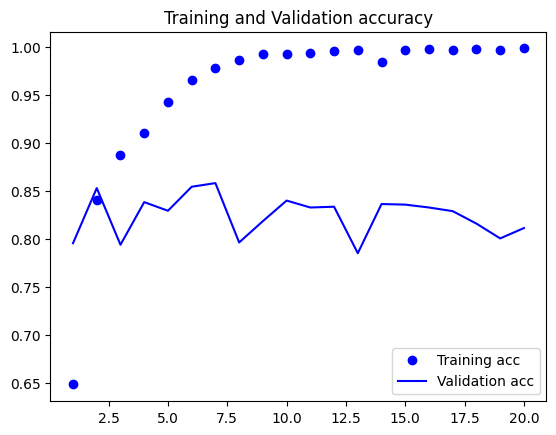

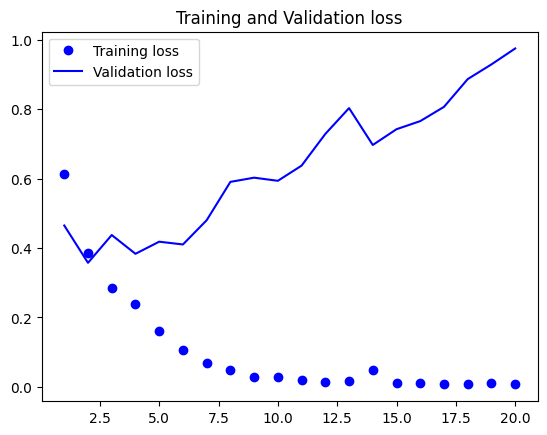

In [ ]:
#Plotting the results
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()
